# Q3

In [ ]:


import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import pandas as pd


#Data augmentation for train dataset
train_transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(), #flip in horizontal
    transforms.RandomCrop(32, padding=4), #crop random
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 10

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
print(len(trainset))

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
print(len(testset))

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
50000
Files already downloaded and verified
10000


In [ ]:

#Resources
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
#https://www.youtube.com/watch?v=c36lUUr864M
#https://androidkt.com/convolutional-neural-network-using-sequential-model-in-pytorch/


class CNNNet(nn.Module):

  def __init__(self):
    super(CNNNet, self).__init__()

    self.conv_layer = nn.Sequential(
          nn.Conv2d(3, 16, kernel_size=3, padding=1),   #actually kernel size in whole of my network is 3*3  
          nn.BatchNorm2d(16),    #we should scale(normalize) data's for better output
          nn.ReLU(inplace=True),      #actually i readed somewhere that relu performe better in middle layers
          nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),  # map from 16 filter to 32 filters (network feature maps)
          nn.ReLU(inplace=True),
          nn.MaxPool2d(2,2),   #in this stage we reduce our output i think we have 16 over here

          nn.Conv2d(32, 64, kernel_size=3, padding=1), # map from 32 filter to 64 filters (network feature maps)
          nn.BatchNorm2d(64), #scale
          nn.ReLU(inplace=True),
          nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(2,2), #in this stage we reduce our output i think we have 8 over here

          nn.Dropout2d(p=0.04),  #let's see diffrent view each time!!

          nn.Conv2d(64, 128, kernel_size=3, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(inplace=True),
          nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(2,2) #in this stage we reduce our output i think we have 4 over here
    )

    self.fc_layer = nn.Sequential(
        nn.Dropout(p=0.1),

        nn.Linear(128*4*4, 512),  #128 ouput and 4*4 feature map
        nn.ReLU(inplace=True),

        nn.Linear(512,256),
        nn.ReLU(inplace=True),

        nn.Dropout(p=0.1),

        nn.Linear(256,10)
    )


  def forward(self, x):

    x = self.conv_layer(x)
    # print(x.shape)
    x = x.view(x.size(0), -1)
    # print(x.shape)

    x = self.fc_layer(x)

    return x


cnnNet = CNNNet()

c_fn=nn.CrossEntropyLoss()

# optimizer = optim.SGD(cnnNet.parameters(), lr=0.001)

optimizer = optim.Adam(
    cnnNet.parameters(),
    lr=0.001
)

# print(cnnNet)
print(torch.cuda.device_count())

train_on_gpu = torch.cuda.is_available()   #we are going to turn gpu on because without it we should wait for too long(which is not my type!!!)
if not train_on_gpu:
    print('RUN IN CPU')
else:
    print('RUN IN GPU')

if train_on_gpu:
  cnnNet.cuda()  #turn gpu on

1
RUN IN GPU


In [ ]:
for epoch in range(2): #going to train for 2 epoch

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        if train_on_gpu: #actually tensor of gpu is diffrent from cpu so we should check if it's running with gpu then change tensor
            inputs = inputs.cuda()
            labels = labels.cuda()

        #forward and back
        optimizer.zero_grad()
        outputs = cnnNet(inputs)
        loss = c_fn(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"finished epoch{epoch}")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


finished epoch0
finished epoch1


In [ ]:
#save model
torch.save(cnnNet.state_dict(), 'cnnNet_cifar.pt')  #save model for load in test phase

acc of plane: 73.4                      and number of predictions/total_pred: 734.0/1000.0
acc of car: 71.89999999999999                      and number of predictions/total_pred: 719.0/1000.0
acc of bird: 27.0                      and number of predictions/total_pred: 270.0/1000.0
acc of cat: 7.7                      and number of predictions/total_pred: 77.0/1000.0
acc of deer: 44.2                      and number of predictions/total_pred: 442.0/1000.0
acc of dog: 59.599999999999994                      and number of predictions/total_pred: 596.0/1000.0
acc of frog: 42.8                      and number of predictions/total_pred: 428.0/1000.0
acc of horse: 69.1                      and number of predictions/total_pred: 691.0/1000.0
acc of ship: 43.7                      and number of predictions/total_pred: 437.0/1000.0
acc of truck: 89.9                      and number of predictions/total_pred: 899.0/1000.0
overall accuracy: 52.93


Text(0.5, 15.0, 'Predicted label')

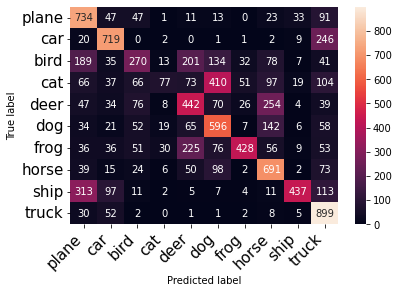

In [ ]:


## load and test
# model = cnnNet
model = CNNNet()
model.load_state_dict(torch.load('cnnNet_cifar.pt')) #load model

correct_pred = list(0. for i in range(10))
total_pred = list(0. for i in range(10))

#turn on gpu if it's available
if train_on_gpu:
  model.cuda()

pred_list=torch.zeros(0,dtype=torch.long, device='cpu')  #predition lists
true_list=torch.zeros(0,dtype=torch.long, device='cpu')  #true lists

#we should not change model prams during test phase
with torch.no_grad():
  for data in testloader:

    inputs, labels = data

    if train_on_gpu: #get cuda tensors
        inputs = inputs.cuda()
        labels = labels.cuda()

    output = model(inputs)
    _, preds = torch.max(output, 1) #preds in batch

    pred_list=torch.cat([pred_list,preds.view(-1).cpu()])
    true_list=torch.cat([true_list,labels.view(-1).cpu()])

    correct_preds = preds.eq(   #check number of correct preditions
        labels.data.view_as(preds)
    )

    if train_on_gpu:  #as i said tensor of cpu is diffrent from gpu
      correct = np.squeeze(
          correct_preds.cpu().numpy()
      )
    else:
      correct = np.squeeze(
          correct_preds.numpy()
      )
    

    for i in range(batch_size):  #add each predict label to it's class
        label = labels.data[i]
        correct_pred[label] += correct[i].item()
        total_pred[label] += 1



for i in range(10):  #print accuracy of each class
  acc = 100 * (correct_pred[i] / total_pred[i])
  print(f"acc of {classes[i]}: {acc}                      and number of predictions/total_pred: {np.sum(correct_pred[i])}/{np.sum(total_pred[i])}")


print(f"overall accuracy: {100. * (np.sum(correct_pred) / np.sum(total_pred))}")


#Print confusion matrix
cm = confusion_matrix(true_list.numpy(), pred_list.numpy())
df_cm = pd.DataFrame(cm, index=classes, columns=classes).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')